In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [142]:
df = pd.read_csv("Housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [143]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    str  
 6   guestroom         545 non-null    str  
 7   basement          545 non-null    str  
 8   hotwaterheating   545 non-null    str  
 9   airconditioning   545 non-null    str  
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    str  
 12  furnishingstatus  545 non-null    str  
dtypes: int64(6), str(7)
memory usage: 55.5 KB


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [144]:
yes_no_cols = ['mainroad','guestroom','basement',
               'hotwaterheating','airconditioning','prefarea']

for col in yes_no_cols:
    df[col] = df[col].map({'yes':1, 'no':0})


In [145]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


In [146]:
df['price_per_area'] = df['price'] / df['area']


In [147]:
X = df.drop("price", axis=1)
y = df["price"]


In [148]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [149]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [150]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))


Linear Regression RMSE: 766300.9143587584
Linear Regression R2: 0.8838245265717736


In [151]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))


Random Forest RMSE: 573354.1356215848
Random Forest R2: 0.9349628259551587


In [152]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("XGBoost R2:", r2_score(y_test, y_pred_xgb))


XGBoost RMSE: 533410.1721714726
XGBoost R2: 0.9437090754508972


In [153]:
cv_scores = cross_val_score(rf, X_scaled, y, cv=5, scoring='r2')
print("Cross Validation R2:", cv_scores.mean())


Cross Validation R2: -1.0731066832829232


In [154]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


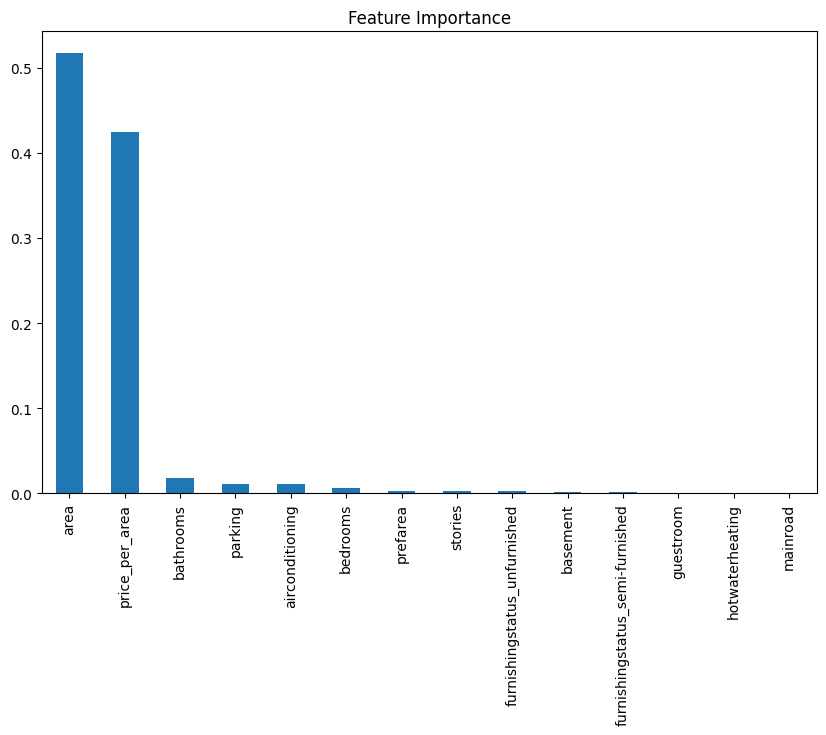

In [155]:
importances = rf.feature_importances_
features = X.columns

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.plot(kind='bar')
plt.title("Feature Importance")
plt.show()


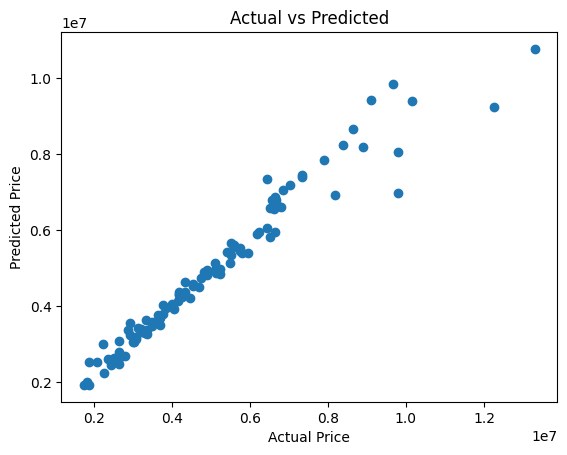

In [156]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()


<Axes: ylabel='price'>

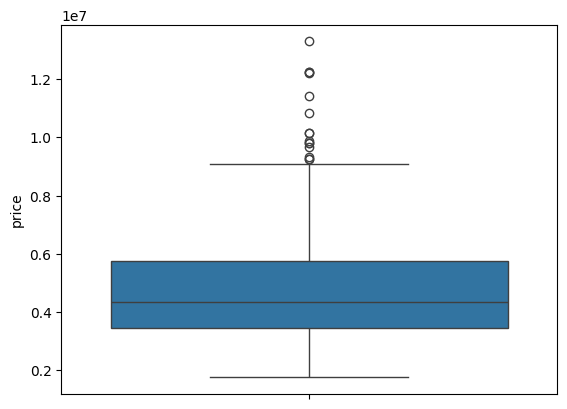

In [157]:
# Remove outliers
sns.boxplot(df['price'])
